In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
X_train=pd.read_csv('data_set_ALL_AML_train.csv')
X_train.shape

(7129, 78)

In [3]:
y=pd.read_csv('actual.csv')
y.shape

(72, 2)

In [4]:
X_test=pd.read_csv('data_set_ALL_AML_independent.csv')
X_test.shape

(7129, 70)

In [5]:
X_test.head()

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


In [6]:
# 1)  Remove "call" columns from training a test
train_keepers = [col for col in X_train.columns if "call" not in col]
test_keepers = [col for col in X_test.columns if "call" not in col]
X_train = X_train[train_keepers]
X_test = X_test[test_keepers]

In [7]:
X_train.shape,X_test.shape

((7129, 40), (7129, 36))

In [8]:
X_train.head()

,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,35,36,37,38,28,29,30,31,32,33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,7,-213,-25,-72,-4,15,-318,-32,-124,-135
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,-57,136,124,-1,-125,2,-95,49,-37,-70
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,...,132,318,325,392,241,193,312,230,330,337
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,...,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407


In [9]:
X_train.head()

,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,35,36,37,38,28,29,30,31,32,33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,7,-213,-25,-72,-4,15,-318,-32,-124,-135
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,-57,136,124,-1,-125,2,-95,49,-37,-70
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,...,132,318,325,392,241,193,312,230,330,337
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,...,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407


In [10]:
X_test.head()

,Gene Description,Gene Accession Number,39,40,42,47,48,49,41,43,...,54,57,58,60,61,65,66,63,64,62
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,-87,22,-243,-130,-256,-62,86,...,-90,-137,-157,-172,-47,-62,-58,-161,-48,-176
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,-248,-153,-218,-177,-249,-23,-36,...,-87,-51,-370,-122,-442,-198,-217,-215,-531,-284
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,262,17,-163,-28,-410,-7,-141,...,102,-82,-77,38,-21,-5,63,-46,-124,-81
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,295,276,182,266,24,142,252,...,319,178,340,31,396,141,95,146,431,9
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,-226,-211,-289,-170,-535,-233,-201,...,-283,-135,-438,-201,-351,-256,-191,-172,-496,-294


In [11]:
# 2) Transpose
X_train = X_train.T
X_test = X_test.T
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


In [12]:
X_train.shape

(40, 7129)

In [13]:
# 3) Clean up the column names for training data
X_train.columns = X_train.iloc[1]
X_train = X_train.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)

# Clean up the column names for Testing data
X_test.columns = X_test.iloc[1]
X_test = X_test.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)

X_train.head()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [14]:
X_train.shape,X_test.shape

((38, 7129), (34, 7129))

In [15]:
# 4) Split into train and test 
X_train = X_train.reset_index(drop=True)
print(X_train.shape)
y_train = y[y.patient <= 38].reset_index(drop=True)
# Subet the rest for testing
X_test = X_test.reset_index(drop=True)
y_test = y[y.patient > 38].reset_index(drop=True)

(38, 7129)


## Scale data

In [16]:
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.fit_transform(X_test)
X_train.head()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
3,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
4,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


## Data Preprocessing (Standardization) and Dimensionality Reduction (PCA)

In [17]:
pca=PCA()
pca.fit_transform(X_train_scl)

array([[ 1.85447987e+01,  5.82694304e+00, -1.94423127e+01, ...,
        -3.14979582e+00, -5.19942835e-01,  1.45162143e-14],
       [-7.34138894e+00,  1.00086631e+01,  1.17956977e+01, ...,
         3.91741309e+00, -2.34562750e-01,  1.45162143e-14],
       [ 5.28521459e+01,  1.13906298e+01, -2.95485659e+01, ...,
        -3.08792878e+00,  3.61420168e+00,  1.45162143e-14],
       ...,
       [ 3.29958693e+00, -2.63018075e+01,  8.76633590e-01, ...,
        -7.79008035e-01, -5.71406496e+00,  1.45162143e-14],
       [ 3.14422261e+01, -8.74368454e+00,  9.76210148e+00, ...,
         2.42913115e+00,  4.83899287e-01,  1.45162143e-14],
       [ 7.48350965e+01, -2.30086262e+01,  4.09630984e+01, ...,
         6.81823148e-01,  1.78649973e+00,  1.45162143e-14]])

In [18]:
total=sum(pca.explained_variance_)
k=0
current_variance=0
while current_variance/total < 0.90:
    current_variance += pca.explained_variance_[k]
    k=k+1
k

28

In [19]:
pca = PCA(n_components=k)

In [20]:
X_train_pca=pca.fit_transform(X_train_scl)
X_test_pca=pca.transform(X_test_scl)

## Around 90% of variance is explained by 28 features

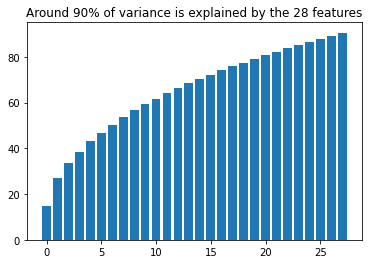

In [21]:
import matplotlib.pyplot as plt
cum_sum = pca.explained_variance_ratio_.cumsum()
cum_sum = cum_sum*100
plt.bar(range(k), cum_sum)
plt.title("Around 90% of variance is explained by the 28 features");

In [22]:
X_train_pca.shape, X_test_pca.shape

((38, 28), (34, 28))

In [23]:
y_train = y_train.replace({'ALL':0,'AML':1})

## Support Vector Classification

In [24]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix

## Cross validation evaluation technique to optimize the model performance

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
# Grid Search
# Parameter Grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]} 
# Make grid search classifier
clf_grid = GridSearchCV(svm.SVC(), param_grid, verbose=1)

# Train the classifier
clf_grid.fit(X_train_pca, y_train.iloc[:,1])

# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Parameters:
 {'C': 10, 'gamma': 1e-05}
Best Estimators:
 SVC(C=10, gamma=1e-05)


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.3s finished


In [27]:
model = svm.SVC(kernel='rbf', C = 10.0, gamma=1e-05)

In [28]:
model.fit(X_train_pca,y_train.iloc[:,1])

SVC(C=10.0, gamma=1e-05)

In [29]:
pred=model.predict(X_test_pca)

In [30]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [31]:
y_test = y_test.replace({'ALL':0,'AML':1})

In [32]:
pred=pred.tolist()

In [33]:
print('Accuracy: ', accuracy_score(y_test.iloc[:,1], pred))

Accuracy:  0.6176470588235294


In [34]:
import sklearn
sklearn.metrics.confusion_matrix(y_test.iloc[:,1], pred)

array([[17,  3],
       [10,  4]], dtype=int64)

## GradientBoostingClassifier

In [35]:
from sklearn.ensemble import GradientBoostingClassifier as XGB

In [36]:
model= XGB(max_depth=5, loss='exponential', n_estimators=50, learning_rate=0.8, random_state=2018)

In [37]:
model.fit(X_train_pca, y_train.iloc[:,1])

GradientBoostingClassifier(learning_rate=0.8, loss='exponential', max_depth=5,
                           n_estimators=50, random_state=2018)

In [38]:
pred = model.predict(X_test_pca)
print('Accuracy: ', accuracy_score(y_test.iloc[:,1], pred))

Accuracy:  0.6176470588235294


In [39]:
sklearn.metrics.confusion_matrix(y_test.iloc[:,1], pred)

array([[19,  1],
       [12,  2]], dtype=int64)

## XGboost

In [40]:
import xgboost

In [41]:
model=xgboost.XGBClassifier()

In [42]:
model.fit(X_train_pca, y_train.iloc[:,1])

XGBClassifier()

In [43]:
pred = model.predict(X_test_pca)

In [44]:
print('Accuracy: ', accuracy_score(y_test.iloc[:,1], pred))

Accuracy:  0.6470588235294118


In [45]:
sklearn.metrics.confusion_matrix(y_test.iloc[:,1], pred)

array([[20,  0],
       [12,  2]], dtype=int64)